ИУ5И-23М Фу Чэньтянь
- РК №1 :"Методы обработки данных."

- Номер варианта: 17
- Номер задания 1: 17
- Номер задания 2: 37

In [4]:
# Import standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv("CAR DETAILS FROM CAR DEKHO.csv")
print(data.info())
data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB
None


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


# Задача №17.
Для набора данных проведите нормализацию для одного (произвольного) числового признака с использованием преобразования Йео-Джонсона (Yeo-Johnson transformation).

Optimal lamda value: -0.021781264191489513
   selling_price  selling_price_yeo
0          60000           9.783129
1         135000          10.415649
2         600000          11.550360
3         250000          10.888858
4         450000          11.334378
5         140000          10.443754
6         550000          11.485178
7         240000          10.857704
8         850000          11.810053
9         365000          11.176352


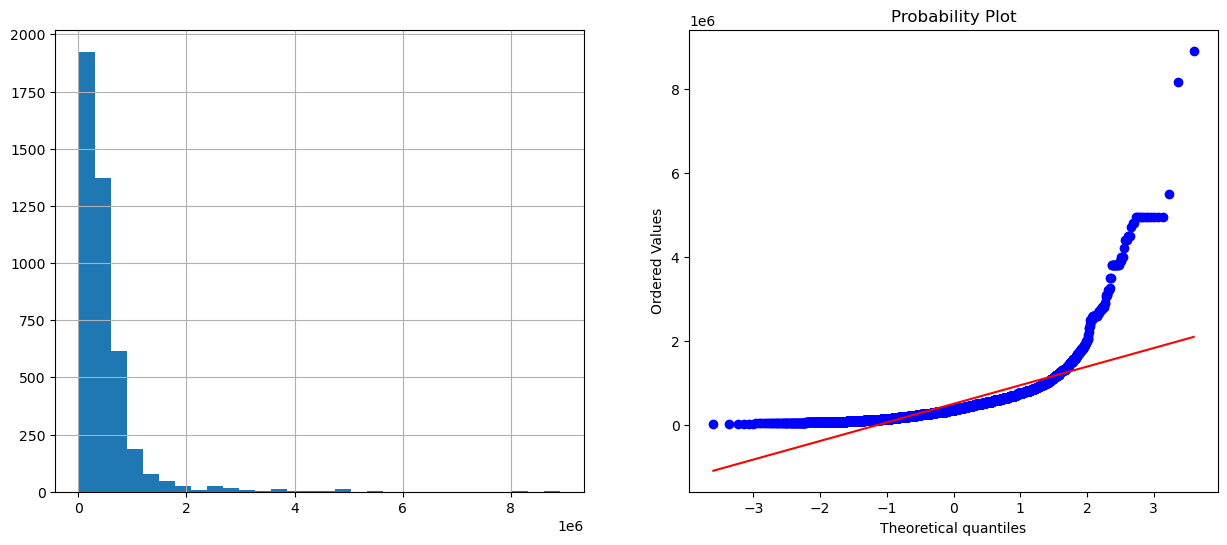

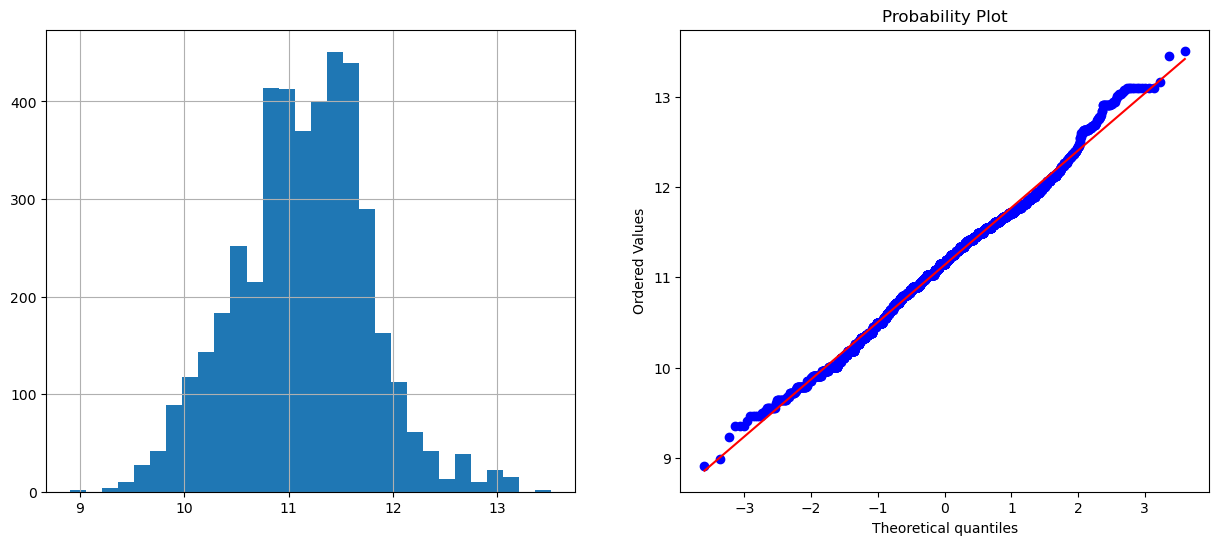

In [8]:
from scipy.stats import yeojohnson
import scipy.stats as stats

data['selling_price_yeo'], param = yeojohnson(data['selling_price'])

print('Optimal lamda value:', param)
print(data[['selling_price', 'selling_price_yeo']].head(10))

def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    # 直方图
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    # Q-Q 图
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

# 检查原始数据分布
diagnostic_plots(data, 'selling_price')

# 检查 Yeo-Johnson 变换后的分布
diagnostic_plots(data, 'selling_price_yeo')

# Задача №37.
Для набора данных проведите процедуру отбора признаков (feature selection). Используйте класс SelectPercentile для 5% лучших признаков, и метод, основанный на взаимной информации.

In [9]:
import pandas as pd
from sklearn.feature_selection import SelectPercentile, mutual_info_regression
from sklearn.preprocessing import LabelEncoder

# Загрузка данных
data = pd.read_csv("CAR DETAILS FROM CAR DEKHO.csv")

# Подготовка данных
# Преобразование категориальных признаков в числовые
categorical_cols = ['name', 'fuel', 'seller_type', 'transmission', 'owner']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Разделение на признаки и целевую переменную
X = data.drop('selling_price', axis=1)  # Признаки
y = data['selling_price']              # Целевая переменная (цена продажи)

# Отбор признаков с использованием взаимной информации
selector = SelectPercentile(score_func=mutual_info_regression, percentile=5)
selector.fit(X, y)

# Получение индексов отобранных признаков
selected_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_indices]

print("Отобранные признаки (топ 5%):")
print(selected_features)

# Получение оценок важности всех признаков
feature_scores = pd.DataFrame({
    'Признак': X.columns,
    'Оценка важности': selector.scores_
}).sort_values('Оценка важности', ascending=False)

print("\nОценки важности всех признаков:")
print(feature_scores)

Отобранные признаки (топ 5%):
Index(['year'], dtype='object')

Оценки важности всех признаков:
        Признак  Оценка важности
1          year         0.396045
4   seller_type         0.141817
5  transmission         0.112525
2     km_driven         0.107729
0          name         0.102788
3          fuel         0.091516
6         owner         0.087210


Объяснение кода:
Загрузка данных: Мы загружаем датасет с информацией о автомобилях.

Преобразование категориальных признаков: Метод взаимной информации требует числовых данных, поэтому мы преобразуем категориальные признаки с помощью LabelEncoder.

Разделение данных: Выделяем признаки (X) и целевую переменную (y - цена продажи).

Отбор признаков:

Используем SelectPercentile с методом mutual_info_regression (взаимная информация для регрессии)

Указываем percentile=5 для выбора топ 5% признаков

Результаты:

Выводим отобранные признаки (5% лучших)

Выводим оценки важности всех признаков, отсортированные по убыванию

Интерпретация результатов:
Метод взаимной информации оценивает, насколько каждый признак информативен для предсказания целевой переменной. Признаки с наибольшими значениями оценки важности будут отобраны как наиболее релевантные для предсказания цены продажи автомобиля.

Для данного датасета наиболее важными признаками, вероятно, окажутся год выпуска (year) и пробег (km_driven), так как они обычно сильно коррелируют с ценой автомобиля. Категориальные признаки также будут оценены, но их важность может быть ниже.

# Дополнительные требования для ИУ5И-23М 
Для студентов групп ИУ5-23М, ИУ5И-23М - для произвольной колонки данных построить график "Ящик с усами (boxplot)".

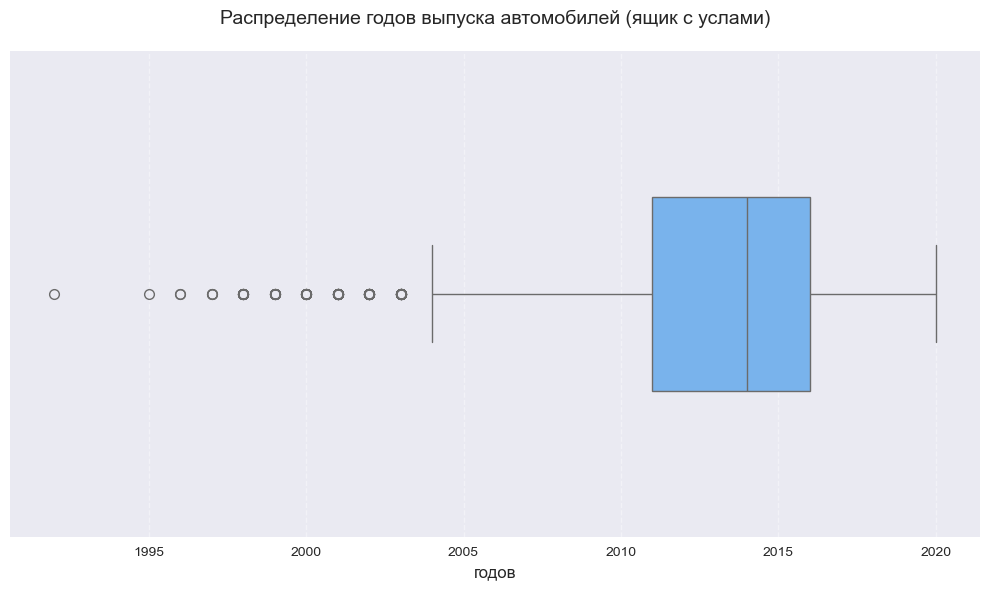

In [10]:
plt.style.use('seaborn')
plt.figure(figsize=(10,6))

sns.boxplot(x=data['year'], color = '#66b3ff', width = 0.4)

plt.title('Распределение годов выпуска автомобилей (ящик с услами)', fontsize=14, pad=20)
plt.xlabel('годов', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()